In [1]:
import datetime
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

# API use and data transformation.
Based on JPM tutorial. A way to parse API requested data straight into Pandas DataFrame. The tutorial is available on Github: https://github.com/jpmorganchase/python-training/blob/main/notebooks/4_webapi.ipynb
Some minor changes had been done to the original version.

In [2]:
# Original api provider's URL
coindeskURL = "http://api.coindesk.com/v1/bpi/historical/close.json?"

# setting dates for API requests
startDate = datetime.date(2019, 1, 1)                                   # Start date of observations
endDate = datetime.date(2021,11,19)                                     # End date. One can try date.today()

# URL constructor
url = f'{coindeskURL}start={startDate:%Y-%m-%d}&end={endDate:%Y-%m-%d}'

# User message to check if it is allright
print(f'Hitting this url: {url}')

Hitting this url: http://api.coindesk.com/v1/bpi/historical/close.json?start=2019-01-01&end=2021-11-19


In [3]:
# Getting download and printing data
result = requests.get(url)
result.content

b'{"bpi":{"2019-01-01":3869.47,"2019-01-02":3941.2167,"2019-01-03":3832.155,"2019-01-04":3863.6267,"2019-01-05":3835.5983,"2019-01-06":4083.165,"2019-01-07":4041.4583,"2019-01-08":4029.9917,"2019-01-09":4028.2917,"2019-01-10":3669.5825,"2019-01-11":3660.9583,"2019-01-12":3658.6725,"2019-01-13":3540.1583,"2019-01-14":3706.1725,"2019-01-15":3604.1333,"2019-01-16":3630.2567,"2019-01-17":3665.41,"2019-01-18":3630.785,"2019-01-19":3708.9633,"2019-01-20":3552.8933,"2019-01-21":3548.69,"2019-01-22":3598.2183,"2019-01-23":3576.01,"2019-01-24":3598.2717,"2019-01-25":3582.2,"2019-01-26":3580.775,"2019-01-27":3553.0133,"2019-01-28":3454.48,"2019-01-29":3421.12,"2019-01-30":3482.3,"2019-01-31":3441.985,"2019-02-01":3468.2517,"2019-02-02":3466.2175,"2019-02-03":3443.1667,"2019-02-04":3451.115,"2019-02-05":3472.035,"2019-02-06":3393.6717,"2019-02-07":3385.97,"2019-02-08":3657.4017,"2019-02-09":3654.3,"2019-02-10":3681.0517,"2019-02-11":3621.0283,"2019-02-12":3622.7133,"2019-02-13":3605.3133,"2019-02

In [4]:
# Transforming JSON object to Pandas Dataframe
jsondata = json.loads(result.content)
jsondata

{'bpi': {'2019-01-01': 3869.47,
  '2019-01-02': 3941.2167,
  '2019-01-03': 3832.155,
  '2019-01-04': 3863.6267,
  '2019-01-05': 3835.5983,
  '2019-01-06': 4083.165,
  '2019-01-07': 4041.4583,
  '2019-01-08': 4029.9917,
  '2019-01-09': 4028.2917,
  '2019-01-10': 3669.5825,
  '2019-01-11': 3660.9583,
  '2019-01-12': 3658.6725,
  '2019-01-13': 3540.1583,
  '2019-01-14': 3706.1725,
  '2019-01-15': 3604.1333,
  '2019-01-16': 3630.2567,
  '2019-01-17': 3665.41,
  '2019-01-18': 3630.785,
  '2019-01-19': 3708.9633,
  '2019-01-20': 3552.8933,
  '2019-01-21': 3548.69,
  '2019-01-22': 3598.2183,
  '2019-01-23': 3576.01,
  '2019-01-24': 3598.2717,
  '2019-01-25': 3582.2,
  '2019-01-26': 3580.775,
  '2019-01-27': 3553.0133,
  '2019-01-28': 3454.48,
  '2019-01-29': 3421.12,
  '2019-01-30': 3482.3,
  '2019-01-31': 3441.985,
  '2019-02-01': 3468.2517,
  '2019-02-02': 3466.2175,
  '2019-02-03': 3443.1667,
  '2019-02-04': 3451.115,
  '2019-02-05': 3472.035,
  '2019-02-06': 3393.6717,
  '2019-02-07': 338

In [15]:
# First method of parsing JSON format to DataFrame with pandas function
data = pd.read_json(result.content)
data

,bpi,disclaimer,time
2019-01-01,3869.4700,This data was produced from the CoinDesk Bitco...,NaN
2019-01-02,3941.2167,This data was produced from the CoinDesk Bitco...,NaN
2019-01-03,3832.1550,This data was produced from the CoinDesk Bitco...,NaN
2019-01-04,3863.6267,This data was produced from the CoinDesk Bitco...,NaN
2019-01-05,3835.5983,This data was produced from the CoinDesk Bitco...,NaN
...,...,...,...
2021-11-17,60364.0850,This data was produced from the CoinDesk Bitco...,NaN
2021-11-18,56925.4283,This data was produced from the CoinDesk Bitco...,NaN
2021-11-19,58121.7817,This data was produced from the CoinDesk Bitco...,NaN
updated,NaN,This data was produced from the CoinDesk Bitco...,"Nov 20, 2021 00:03:00 UTC"


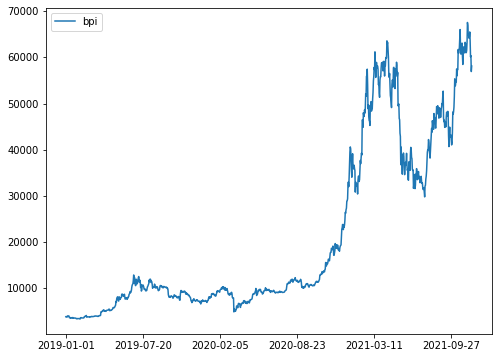

In [16]:
%matplotlib inline 
data.plot(figsize=(8,6))

In [7]:
# Better method of parsing JSON data, allowing for hand-picking of fields of our interest
data = pd.DataFrame({'Bitcoin_Price_Index': jsondata['bpi']})       # Look how nicely the header was created!
data

,Bitcoin_Price_Index
2019-01-01,3869.4700
2019-01-02,3941.2167
2019-01-03,3832.1550
2019-01-04,3863.6267
2019-01-05,3835.5983
...,...
2021-11-15,63599.7467
2021-11-16,60112.9583
2021-11-17,60364.0850
2021-11-18,56925.4283


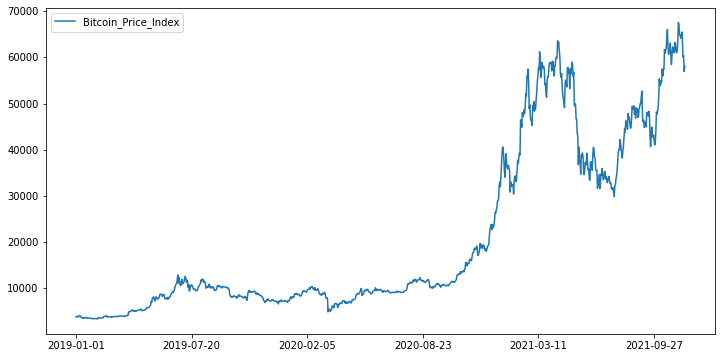

In [10]:
data.plot(figsize=(12,6))
plt.show()

In [29]:
# Just playing with time object
curr_date = datetime.date.today()
curr_date.isoformat()

'2021-11-20'